In [1]:

import sys
import os
import pandas as pd

import seaborn as sns

In [2]:

project_root = os.path.abspath("../../")
if project_root not in sys.path:
    sys.path.insert(0, project_root)

print(sys.path)
print(project_root)

import exp_driver.experiment as E

['/data/marci/mjakowsk/EDS4AI/DeficitProject', '/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python311.zip', '/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11', '/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/lib-dynload', '', '/home/mjakowsk/.local/lib/python3.11/site-packages', '/data/marci/mjakowsk/miniconda3/envs/eds2/lib/python3.11/site-packages']
/data/marci/mjakowsk/EDS4AI/DeficitProject


In [8]:

params = {
    #"deficit_params" : {"deficit_duration":40}
    "deficit_params" : {"subset_size":0.1}
}
exps = E.match_experiments(directories=["random_subset_AVG", "similarity_AVG", "disimilarity_AVG", "disimilarity"], params=params)
len(exps)

195

In [9]:

deficit_type = []
final_test_acc = []
deficit_end = []
training_duration = []
id = []

for exp_id, dir in exps:
    id.append(exp_id)

    config = E.get_config(exp_id=exp_id, dir=dir)
    deficit_params = config["deficit_params"]

    _, _, _, test_accs = E.get_data(exp_id=exp_id, dir= dir)

    final_acc = test_accs[-1]

    if config['deficit_name'] == "SimilarityTypeDeficit" :
        deficit_type.append(deficit_params["type"])
    else :
        deficit_type.append("random")

    
    deficit_end.append(deficit_params["end_epoch"])
    final_test_acc.append(final_acc)
    training_duration.append(config["num_epochs"])



df = pd.DataFrame({
    "Type" : deficit_type,
    "Accuracy" : final_test_acc,
    "Deficit Removal" : deficit_end,
    "Training Duration" : training_duration,
    "ID" : id,
                  })
    

In [ ]:

pd.set_option("display.max_rows", 50) 
pd.set_option("display.max_rows", None) 
df

In [10]:
df.groupby(["Type","Deficit Removal"])["Accuracy"].mean()

Type          Deficit Removal
disimilarity  0                  93.550000
              20                 93.340000
              40                 92.770000
              80                 90.260000
              120                86.390000
              160                82.770000
              200                78.590000
              240                75.610000
              280                71.790000
              320                68.410000
              360                66.210000
              400                63.550000
              440                62.580000
              480                61.550000
              520                61.830000
random        0                  93.428000
              20                 93.086000
              40                 92.638000
              80                 91.008000
              120                87.768000
              160                84.840000
              200                83.350000
              240       

Text(0.5, 1.0, 'Random Subset Deficit Removal Average')

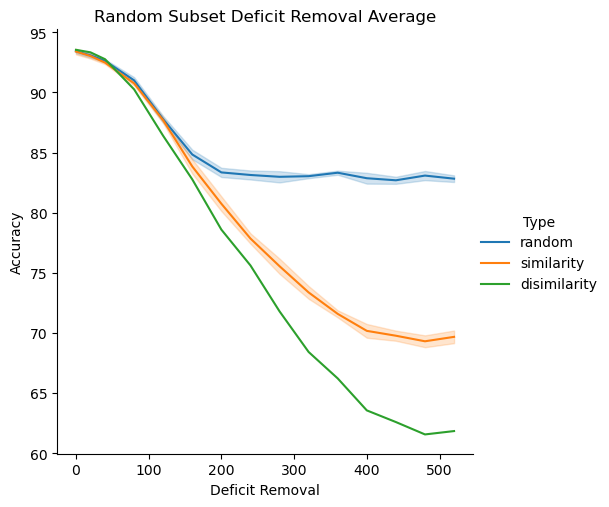

In [11]:
s = sns.relplot(
    data=df, kind="line",
    x="Deficit Removal", y="Accuracy", hue="Type",
    errorbar="sd",
    dashes=False, markers=True,
)
s.ax.set_title("Random Subset Deficit Removal Average")
#s.ax.set_ylim(df["Accuracy"].min() - 1, df["Accuracy"].max()+1)
#s.ax.margins(y=0.1)

In [ ]:

s = sns.lineplot(data=df, x='epoch', y='accuracy', hue='deficit_name', marker='o')